The first 6 optimisation attempts were focused around feature selection based on the importance and correlation. 

The optimisation 7, we compared the training and testing accuracy and Optimisation 8 was performed to tune the number of trees (n_estimator). 

In Optimisation 9 and 10, we tried with the larger model to learn the best range of hyperparameters (e.g. alpha, lamba etc) and in the final attempt we are trying to use the shorter version of the model by trying to incorporate the hyperparameter outputs that we obtained from Optimisation 8 and 10.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/datasets/jaykansara2019/df-stratified/df_stratified.csv


In [2]:
# Import dependencies 
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

plt.style.use('dark_background')

In [3]:
# Import encoded datafram
encoded_df3 = pd.read_csv("../input/d/datasets/jaykansara2019/df-stratified/df_stratified.csv")
encoded_df3 = encoded_df3.drop(['beer_name','beer_id','brewery_id','country_beer','brewery_name','city','look','smell','feel','overall','score'], axis=1)
encoded_df3

,state_beer,style,availability,abv,distribution,taste
0,PA,German Hefeweizen,Year round,5.4,"Brewery, Bar, Eatery",3.75
1,OR,German Hefeweizen,Year round,4.9,Brewery,3.50
2,CA,German Hefeweizen,Year round,4.8,"Brewery, Bar, Eatery",4.50
3,PA,German Hefeweizen,Year round,4.8,"Brewery, Bar, Eatery, Beer-to-go",3.00
4,MO,German Hefeweizen,Year round,4.1,"Brewery, Bar, Eatery, Beer-to-go",3.50
...,...,...,...,...,...,...
443995,IL,Stout,Rotating,10.5,"Brewery, Beer-to-go",4.50
443996,MI,Stout,Year round,11.0,"Brewery, Bar, Eatery, Beer-to-go",4.25
443997,WA,Stout,Fall,13.1,"Brewery, Bar, Eatery, Beer-to-go",4.75
443998,CA,Stout,Rotating,10.2,"Brewery, Bar, Beer-to-go",4.50


In [4]:
# import dependencies
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [5]:
#encode string values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_df4 = encoded_df3.copy()
encoded_df4['state_beer'] = le.fit_transform(encoded_df4['state_beer'])
encoded_df4['availability'] = le.fit_transform(encoded_df4['availability'])
encoded_df4['distribution'] = le.fit_transform(encoded_df4['distribution'])
encoded_df4['style'] = le.fit_transform(encoded_df4['style'])

encoded_df4

,state_beer,style,availability,abv,distribution,taste
0,38,18,6,5.4,4,3.75
1,37,18,6,4.9,1,3.50
2,4,18,6,4.8,4,4.50
3,38,18,6,4.8,5,3.00
4,24,18,6,4.1,5,3.50
...,...,...,...,...,...,...
443995,14,36,2,10.5,10,4.50
443996,22,36,6,11.0,5,4.25
443997,47,36,0,13.1,5,4.75
443998,4,36,2,10.2,3,4.50


In [6]:
# Define the target set
y = encoded_df4["style"].values
y

array([18, 18, 18, ..., 36, 36, 36])

In [7]:
#Drop y from the main df
encoded_df4 = encoded_df4.drop(['style'], axis=1)
encoded_df4

,state_beer,availability,abv,distribution,taste
0,38,6,5.4,4,3.75
1,37,6,4.9,1,3.50
2,4,6,4.8,4,4.50
3,38,6,4.8,5,3.00
4,24,6,4.1,5,3.50
...,...,...,...,...,...
443995,14,2,10.5,10,4.50
443996,22,6,11.0,5,4.25
443997,47,0,13.1,5,4.75
443998,4,2,10.2,3,4.50


In [8]:
#define the features set
X = encoded_df4.copy()
X

,state_beer,availability,abv,distribution,taste
0,38,6,5.4,4,3.75
1,37,6,4.9,1,3.50
2,4,6,4.8,4,4.50
3,38,6,4.8,5,3.00
4,24,6,4.1,5,3.50
...,...,...,...,...,...
443995,14,2,10.5,10,4.50
443996,22,6,11.0,5,4.25
443997,47,0,13.1,5,4.75
443998,4,2,10.2,3,4.50


In [9]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [10]:
# Create a StandardScaler instance
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
best_trial1 = {'lambda': 0.6961487559906326, 'alpha': 0.010396164166391456, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 1, 'tree_method': 'gpu_hist','n_estimators': 200 }
best_trial1

{'lambda': 0.6961487559906326,
 'alpha': 0.010396164166391456,
 'colsample_bytree': 0.9,
 'subsample': 0.7,
 'learning_rate': 0.008,
 'max_depth': 17,
 'random_state': 2020,
 'min_child_weight': 1,
 'tree_method': 'gpu_hist',
 'n_estimators': 200}

In [12]:
# create an optimized xgb classifier
xgb_model1 = XGBClassifier(**best_trial1)
# fit the model
xgb_model1 = xgb_model1.fit(X_train_scaled, y_train)

In [13]:
# make predictions for test data
predictions1 = xgb_model1.predict(X_test_scaled)

In [14]:
#calculate matrix and accuracy score
cm1 = confusion_matrix(y_test, predictions1)
cm_df1 = pd.DataFrame(cm1)
accuracy = accuracy_score(y_test, predictions1)

In [15]:
# Display results

print("Confusion Matrix")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Classification Report")
print(classification_report(y_test, predictions1))

Confusion Matrix
Accuracy: 75.83%
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      3651
           1       0.76      0.80      0.78      3689
           2       0.78      0.84      0.81      3668
           3       0.82      0.88      0.85      3638
           4       0.74      0.85      0.79      3584
           5       0.74      0.69      0.71      3683
           6       0.70      0.83      0.76      3681
           7       0.69      0.67      0.68      3685
           8       0.72      0.64      0.68      3671
           9       0.68      0.64      0.66      3747
          10       0.77      0.80      0.79      3637
          11       0.84      0.89      0.86      3610
          12       0.61      0.53      0.57      3701
          13       0.83      0.87      0.85      3724
          14       0.76      0.67      0.72      3687
          15       0.82      0.85      0.83      3593
          16       0.87  

In [16]:
train_predictions = xgb_model1.predict(X_train_scaled)
print(classification_report(y_train, train_predictions))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      7449
           1       0.80      0.83      0.82      7411
           2       0.81      0.87      0.84      7432
           3       0.84      0.90      0.87      7462
           4       0.79      0.88      0.83      7516
           5       0.79      0.73      0.76      7417
           6       0.74      0.86      0.79      7419
           7       0.75      0.72      0.74      7415
           8       0.77      0.69      0.72      7429
           9       0.73      0.69      0.71      7353
          10       0.80      0.83      0.81      7463
          11       0.85      0.90      0.88      7490
          12       0.67      0.62      0.65      7399
          13       0.85      0.91      0.88      7376
          14       0.82      0.72      0.76      7413
          15       0.84      0.87      0.86      7507
          16       0.88      0.92      0.90      7459
          17       0.85    

In [17]:
#Calculate feature importance in the Random Forest model and rank them
importances = xgb_model1.feature_importances_
sorted(zip(xgb_model1.feature_importances_, X.columns), reverse = True)

[(0.30646607, 'availability'),
 (0.30558464, 'abv'),
 (0.1848866, 'state_beer'),
 (0.17224413, 'distribution'),
 (0.03081858, 'taste')]

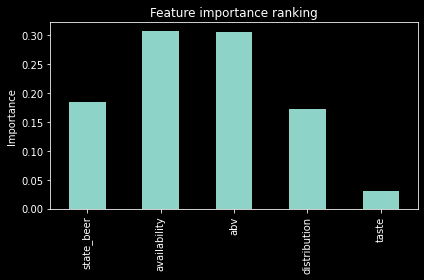

In [18]:
feature_names = X.columns
rf_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title("Feature importance ranking")
ax.set_ylabel("Importance")
fig.tight_layout()
plt.savefig('Feature importance ranking.png')

In [19]:
#Export testing classification report
df1 = pd.DataFrame(classification_report(y_test, predictions1, output_dict=True))
df1.to_csv('test_classification_report_xgboost.csv',index=False)


In [20]:
#Export training classification report
df2 = pd.DataFrame(classification_report(y_train, train_predictions, output_dict=True))
df2.to_csv('train_classification_report_xgboost.csv',index=False)